In [41]:
#pip install matplotlib

In [42]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [43]:
import matplotlib
matplotlib.__version__

'3.9.4'

In [44]:
tf.__version__

'2.10.1'

In [45]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
(x_train, y_train), _ = tf.keras.datasets.cifar10.load_data()

Example training images and their labels:<generator object <genexpr> at 0x00000231AD7F60B0>
Corresponding classes for the labels: <generator object <genexpr> at 0x00000231BD056190>


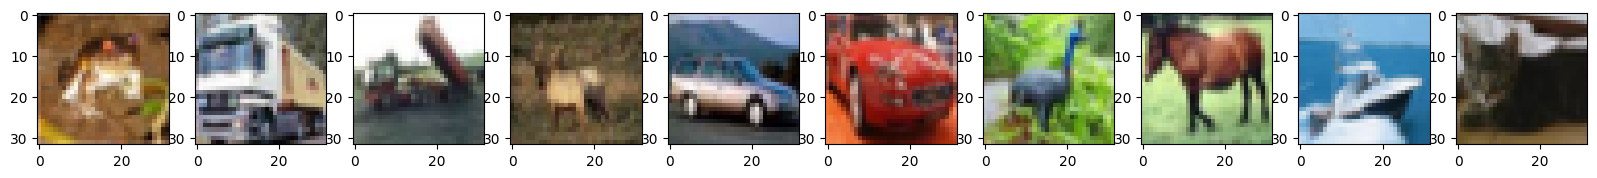

In [46]:
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck',]
print('Example training images and their labels:' + str(x[0] for x in y_train[0:10]))
print('Corresponding classes for the labels: ' + str(cifar10_classes[x[0]] for x in y_train[0:10]))

fig, axarr = plt.subplots(1,10)
fig.set_size_inches(20,6)

for i in range(10):
    image = x_train[i]
    axarr[i].imshow(image)
plt.show()

In [47]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [48]:
x_train = x_train / 255.0
x_test = x_test / 255.0
#Every Neuron is expected to have value from 0 to 1 converge quickly(Gradient Descent) 

MLP Network

-> Input Layer - Flatten
-> Hidden Layer - 2048, AF='RELU'
-> Output Layer - 10, AF-Softmax

ANN Model

In [ ]:
from tensorflow import keras
from keras.layers import Dense
from keras.layers import Flatten

In [ ]:
ann = keras.Sequential()
ann.add(Flatten(input_shape=(32,32,3)))    #Input layer
ann.add(Dense(2048,activation='relu'))     #Hidden layer
ann.add(Dense(10,activation='softmax'))    #Output layer

In [ ]:
ann.summary()

In [52]:
ann.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [53]:
history = ann.fit(x_train, y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 45s 28ms/step - loss: 1.9166 - accuracy: 0.3300 - val_loss: 1.7067 - val_accuracy: 0.3902
Epoch 2/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.6777 - accuracy: 0.4005 - val_loss: 1.6587 - val_accuracy: 0.4025
Epoch 3/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.6075 - accuracy: 0.4272 - val_loss: 1.6163 - val_accuracy: 0.4332
Epoch 4/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.5645 - accuracy: 0.4444 - val_loss: 1.5760 - val_accuracy: 0.4446
Epoch 5/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.5263 - accuracy: 0.4566 - val_loss: 1.5927 - val_accuracy: 0.4390
Epoch 6/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.5054 - accuracy: 0.4643 - val_loss: 1.5154 - val_accuracy: 0.4598
Epoch 7/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.4878 - accuracy: 0.4727 - val_loss: 1.5346 -

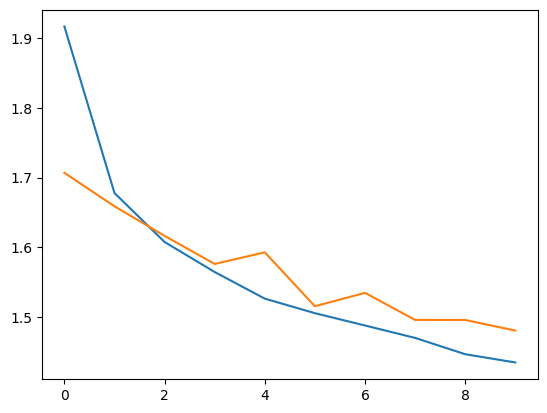

In [60]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

CNN Model

In [61]:
from tensorflow import keras
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout

In [62]:
cnn = keras.Sequential()
cnn.add(Conv2D(32, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu', input_shape = (32,32,3)))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(64, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(128, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(256, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Flatten())
cnn.add(Dense(64,activation='relu')) #hidden layer
cnn.add(Dropout(0.3))
cnn.add(Dense(10,activation='softmax')) #output layer

In [63]:
cnn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 4, 4, 128)       

In [64]:
cnn.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = cnn.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.6059 - accuracy: 0.4111 - val_loss: 1.1781 - val_accuracy: 0.5779
Epoch 2/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.1783 - accuracy: 0.5856 - val_loss: 1.0021 - val_accuracy: 0.6428
Epoch 3/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.9785 - accuracy: 0.6586 - val_loss: 0.9198 - val_accuracy: 0.6728
Epoch 4/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.8371 - accuracy: 0.7113 - val_loss: 0.8155 - val_accuracy: 0.7137
Epoch 5/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.7369 - accuracy: 0.7452 - val_loss: 0.8279 - val_accuracy: 0.7170
Epoch 6/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.6465 - accuracy: 0.7767 - val_loss: 0.7797 - val_accuracy: 0.7355
Epoch 7/10
1563/1563 [==============================] - 51s 32ms/step - loss: 0.5708 - accuracy: 0.8024 - val_loss: 0.7987 -

In [66]:
def plotLosses(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','validation'],loc='upper right')
    plt.show()

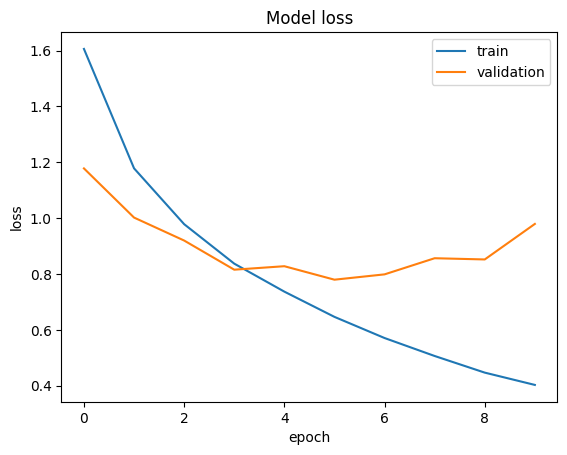

In [67]:
plotLosses(history)

In [68]:
def plotAccuracy(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

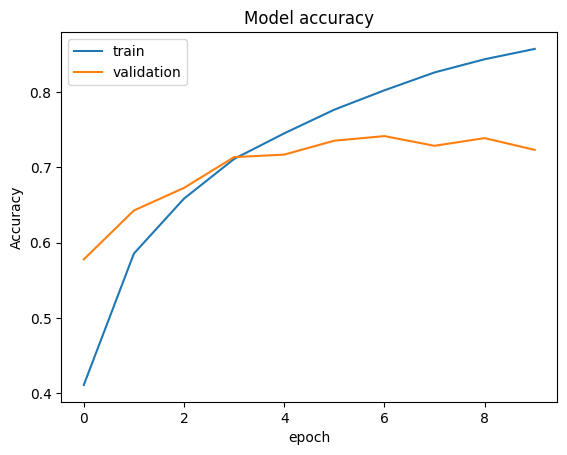

In [69]:
plotAccuracy(history)

In [70]:
score = cnn.evaluate(x_test, y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.9793 - accuracy: 0.7233


In [71]:
print(cnn.metrics_names)
print(score)

['loss', 'accuracy']
[0.9793452024459839, 0.7232999801635742]


In [73]:
from keras.models import load_model

cnn.save('cnn_model.h5')